# EDA and FileHandling

In [35]:
from os import mkdir, path
from sys import platform
import glob
import matplotlib.pyplot as plt
from random import shuffle, seed, randint

## b)

In [32]:
current_directory = path.abspath("")
if platform == "darwin":
    images = [
        (plt.imread(file_path), file_path.split("/")[-1].split(".")[0], file_path)
        for file_path in glob.glob(
            f"{current_directory}/original_dataset/train/train/*.jpg"
        )
    ]
if platform == "win32":
    images = [
        (plt.imread(file_path), file_path.split("/")[-1][6:].split(".")[0], file_path)
        for file_path in glob.glob(
            f"{current_directory}/original_dataset/train/train/*.jpg"
        )
    ]

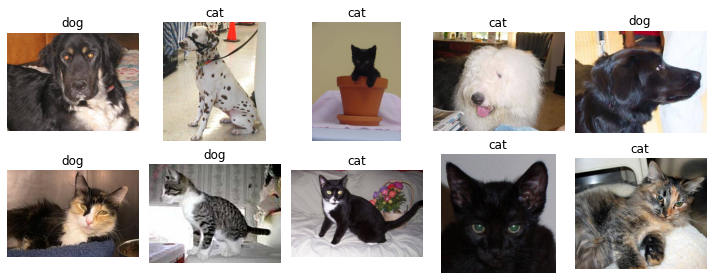

In [53]:
def plot_samples(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for _, ax in enumerate(axes.flatten()):
        ax.imshow(data[randint(0, (len(images)-1))][0], cmap = "gray")
        ax.set_title(data[randint(0, (len(images)-1))][1])
        ax.axis("off")
    fig.tight_layout()

plot_samples(images)

## c)

In [8]:
folder_name_structure = ('experiment_small_dataset', 'experiment_tiny_dataset')

try:
    mkdir(f'{current_directory}/original_dataset')
    for folder_name in folder_name_structure:
        root_folder_name = f'{current_directory}/{folder_name}'
        mkdir(root_folder_name)
        for sub_folder_name in ['test', 'train', 'val']:
            mkdir(f'{root_folder_name}/{sub_folder_name}')
except:
    pass

## d)

In [55]:
seed(42)
def shuffle_list(list_x:list):
    shuffle(list_x)
    return list_x

cat_images = shuffle_list([image[2] for image in images if image[1] == 'cat'])
dog_images = shuffle_list([image[2] for image in images if image[1] == 'dog'])

cat_images[0], dog_images[0]

('c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\cat.153.jpg',
 'c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\dog.11651.jpg')

In [58]:
def move_file(file_name, destination_folder):
    pass

def move_image_files_from_list(image_list:list):
    train_file_names = image_list[:800]
    val_file_names = image_list[800:1000]
    test_file_names = image_list[1000:1500]
    
    return train_file_names[0]

move_image_files_from_list(cat_images)

'c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\cat.153.jpg'